In [1]:
import pandas as pd

#### Read Dataset from "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports"

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

#### Q1 : Display Dataset Info and List down missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  126 non-null    object 
 1   Country/Region  276 non-null    object 
 2   Last Update     276 non-null    object 
 3   Confirmed       276 non-null    int64  
 4   Deaths          276 non-null    int64  
 5   Recovered       276 non-null    int64  
 6   Latitude        276 non-null    float64
 7   Longitude       276 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 17.4+ KB


In [4]:
df.isna().sum()

Province/State    150
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
dtype: int64

In [5]:
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515
...,...,...,...,...,...,...,...,...
271,NaN,Guernsey,2020-03-17T18:33:03,0,0,0,49.4500,-2.5800
272,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100
273,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000
274,NaN,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.5560


#### Q2 :  get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise

In [6]:
df['Active'] = df['Confirmed']-df['Deaths']-df['Recovered']
country_df = df.groupby('Country/Region').sum()
country_df[['Confirmed','Deaths','Recovered','Active']]

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,22,0,1,21
Albania,55,1,0,54
Algeria,60,4,12,44
Andorra,39,0,1,38
Antigua and Barbuda,1,0,0,1
...,...,...,...,...
Uruguay,29,0,0,29
Uzbekistan,10,0,0,10
Venezuela,33,0,0,33


#### Plot first 5 countries bar chart to reflect the number of confirmed, deaths, recovered and active cases

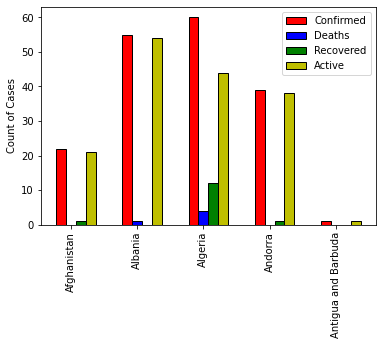

In [7]:
import matplotlib.pyplot as plt
import numpy as np
country_df = df.groupby('Country/Region').sum().head(5)
Countries =[]

for Country , pd in country_df.groupby('Country/Region') : 
    Countries.append(Country)

width = 0.15 
N = country_df['Confirmed'].count()
ind = np.arange(N)  # the x locations for the groups

fig = plt.figure()
ax = fig.add_subplot()
 

ax1 = ax.bar(ind, country_df['Confirmed'],width ,color='r',edgecolor = 'black' )
ax2 = ax.bar(ind+width, country_df['Deaths'],width,color='b' ,edgecolor = 'black')
ax3 = ax.bar(ind+width*2, country_df['Recovered'],width,color='g',edgecolor = 'black')
ax4 = ax.bar(ind+width*3, country_df['Active'],width,color='y',edgecolor = 'black')

ax.set_ylabel('Count of Cases')
ax.set_xticks(ind+width)
ax.set_xticklabels(Countries,rotation='vertical')
ax.legend( (ax1[0], ax2[0], ax3[0],ax4[0]), ('Confirmed', 'Deaths', 'Recovered','Active') )


plt.show() 

#### Q3 : get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise 
	a) by Replacing NaN value of Province/State with Country/Region
	b) Without Replacing NaN values of Province/State

#### Find all the provinence name which has NaN

In [8]:
df[df[['Province/State','Country/Region']].isna().any(axis=1)][['Province/State','Country/Region']]

,Province/State,Country/Region
1,NaN,Italy
2,NaN,Iran
3,NaN,Spain
4,NaN,Germany
5,NaN,"Korea, South"
...,...,...
271,NaN,Guernsey
272,NaN,Jersey
273,NaN,Puerto Rico
274,NaN,Republic of the Congo


#### Replace NaN value of Province/state with respective Country/Region by copying existing DF to another DF using Deep copy method

In [9]:
temp_df = df.copy(deep=True) 
temp_df['Province/State'].fillna(temp_df['Country/Region'],inplace=True)
temp_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685
1,Italy,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062
2,Iran,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792
3,Spain,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187
4,Germany,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,9166
...,...,...,...,...,...,...,...,...,...
271,Guernsey,Guernsey,2020-03-17T18:33:03,0,0,0,49.4500,-2.5800,0
272,Jersey,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100,0
273,Puerto Rico,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000,0
274,Republic of the Congo,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.5560,0


In [10]:
country__Province_df = temp_df.groupby(['Country/Region','Province/State']).sum()
country__Province_df[['Confirmed','Deaths','Recovered','Active']]

,,Confirmed,Deaths,Recovered,Active
Country/Region,Province/State,,,,
Afghanistan,Afghanistan,22,0,1,21
Albania,Albania,55,1,0,54
Algeria,Algeria,60,4,12,44
Andorra,Andorra,39,0,1,38
Antigua and Barbuda,Antigua and Barbuda,1,0,0,1
...,...,...,...,...,...
Uruguay,Uruguay,29,0,0,29
Uzbekistan,Uzbekistan,10,0,0,10
Venezuela,Venezuela,33,0,0,33


#### Doing similar aggrgation on original DF without replacing NaN values of province

In [11]:
country__Province_df_with_na = df.groupby(['Country/Region','Province/State']).sum()
country__Province_df_with_na[['Confirmed','Deaths','Recovered']]

Confirmed  Deaths  Recovered
Country/Region Province/State                                            
Australia      Australian Capital Territory          2       0          0
               From Diamond Princess                 0       0          0
               New South Wales                     210       4          4
               Northern Territory                    1       0          0
               Queensland                           78       0          8
...                                                ...     ...        ...
US             Wyoming                              11       0          0
United Kingdom Cayman Islands                        1       1          0
               Channel Islands                       6       0          0
               Gibraltar                             3       0          1
               United Kingdom                     1950      55         52

[126 rows x 3 columns]

#### Q4 : get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19)

In [12]:
filt = df['Country/Region'] == 'China'
china_df = df.loc[filt][['Province/State','Confirmed','Deaths','Recovered','Active']]
china_df

,Province/State,Confirmed,Deaths,Recovered,Active
0,Hubei,67799,3111,56003,8685
12,Guangdong,1364,8,1307,49
14,Henan,1273,22,1250,1
16,Zhejiang,1232,1,1216,15
19,Hunan,1018,4,1014,0
20,Anhui,990,6,984,0
22,Jiangxi,935,1,934,0
24,Shandong,761,7,746,8
28,Jiangsu,631,0,631,0
29,Chongqing,576,6,570,0


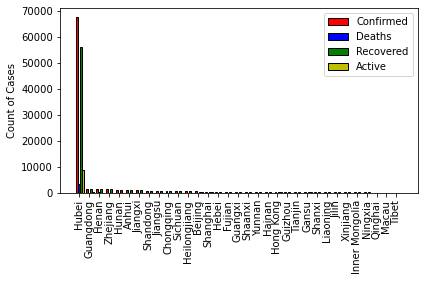

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
State =[]

for state in china_df['Province/State'] : 
    State.append(state)

width = 0.2
N = china_df['Confirmed'].count()
ind = np.arange(N)  # the x locations for the groups

fig = plt.figure()
ax = fig.add_subplot()
 

ax1 = ax.bar(ind, china_df['Confirmed'],width ,color='r',edgecolor = 'black' )
ax2 = ax.bar(ind+width, china_df['Deaths'],width,color='b' ,edgecolor = 'black')
ax3 = ax.bar(ind+width*2, china_df['Recovered'],width,color='g',edgecolor = 'black')
ax4 = ax.bar(ind+width*3, china_df['Active'],width,color='y',edgecolor = 'black')

ax.set_ylabel('Count of Cases')
ax.set_xticks(ind+width)
ax.set_xticklabels(State,rotation='vertical')
ax.legend( (ax1[0], ax2[0], ax3[0],ax4[0]), ('Confirmed', 'Deaths', 'Recovered','Active') )

plt.tight_layout()
plt.show() 

#### Q5: list countries with no cases of Novel Coronavirus (COVID-19) recovered.

In [14]:
country_df = df.groupby('Country/Region').sum()
filt = country_df['Recovered'] == 0
country_df.loc[filt][['Confirmed','Deaths','Recovered','Active']]

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Albania,55,1,0,54
Antigua and Barbuda,1,0,0,1
Aruba,3,0,0,3
Barbados,2,0,0,2
Benin,1,0,0,1
...,...,...,...,...
Ukraine,14,2,0,12
Uruguay,29,0,0,29
Uzbekistan,10,0,0,10


#### Q6: list countries with all cases of Novel Coronavirus (COVID-19) died or Recovered

In [15]:
country_df = df.groupby('Country/Region').sum()
filt = ((country_df['Deaths'] == country_df['Confirmed'] ) & (country_df['Confirmed'] > 0)) | ((country_df['Recovered'] == country_df['Confirmed'] ) & (country_df['Confirmed'] > 0))
country_df.loc[filt][['Confirmed','Deaths','Recovered','Active']]

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Nepal,1,0,1,0
Sudan,1,1,0,0


#### Q7: get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19) based on Number of confirmed cases

In [16]:
country_df = df.groupby('Country/Region').max()
country_df.sort_values(by=['Confirmed'], ascending=False).head(10)[['Last Update','Confirmed','Deaths','Recovered']]

,Last Update,Confirmed,Deaths,Recovered
Country/Region,,,,
China,2020-03-17T12:13:13,67799,3111,56003
Italy,2020-03-17T18:33:02,31506,2503,2941
Iran,2020-03-17T15:13:09,16169,988,5389
Spain,2020-03-17T20:53:02,11748,533,1028
Germany,2020-03-17T18:53:02,9257,24,67
"Korea, South",2020-03-17T10:33:03,8320,81,1407
France,2020-03-17T19:13:08,7652,148,12
Switzerland,2020-03-17T16:33:04,2700,27,4
United Kingdom,2020-03-17T15:13:09,1950,55,52


#### Q8 : create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 50

In [17]:
filt = df['Deaths'] > 50
result = df.loc[filt][['Country/Region','Confirmed','Deaths','Recovered','Active']]
result

,Country/Region,Confirmed,Deaths,Recovered,Active
0,China,67799,3111,56003,8685
1,Italy,31506,2503,2941,26062
2,Iran,16169,988,5389,9792
3,Spain,11748,533,1028,10187
5,"Korea, South",8320,81,1407,6832
6,France,7652,148,12,7492
8,United Kingdom,1950,55,52,1843
18,US,1076,55,1,1020


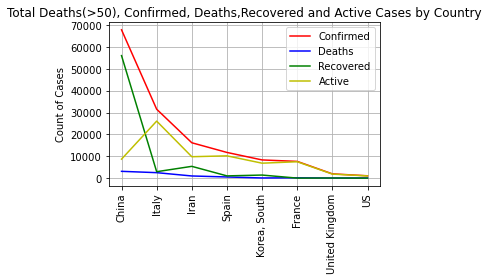

In [18]:
import matplotlib.pyplot as plt
import numpy as np 
Country =[]

for country in result['Country/Region'] : 
    Country.append(country)

fig = plt.figure()
ax = fig.add_subplot()
 

ax1 = ax.plot(Country,result['Confirmed'],width ,color='r')
ax2 = ax.plot(Country,result['Deaths'],width,color='b')
ax3 = ax.plot(Country,result['Recovered'],width,color='g')
ax4 = ax.plot(Country,result['Active'],width,color='y')

ax.set_ylabel('Count of Cases')
ax.set_xticklabels(Country,rotation='vertical')
ax.legend( (ax1[0], ax2[0], ax3[0],ax4[0]), ('Confirmed', 'Deaths', 'Recovered','Active') )
plt.title('Total Deaths(>50), Confirmed, Deaths,Recovered and Active Cases by Country')

plt.tight_layout()
plt.grid()
plt.show() 

#### Q9: visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA where recovery is greater than 0

In [24]:
filt = ((df['Country/Region'] == 'US') &  (df['Recovered'] > 0))
US_DF = df.loc[filt][['Province/State','Confirmed','Deaths','Recovered','Active']]
US_DF

,Province/State,Confirmed,Deaths,Recovered,Active
18,Washington,1076,55,1,1020
25,California,698,12,6,680
44,New Jersey,267,3,1,263
54,Massachusetts,218,0,1,217
69,Illinois,161,1,2,158
102,Wisconsin,72,0,1,71
118,Maryland,60,0,3,57
154,Kentucky,26,1,1,24
169,Arizona,20,0,1,19


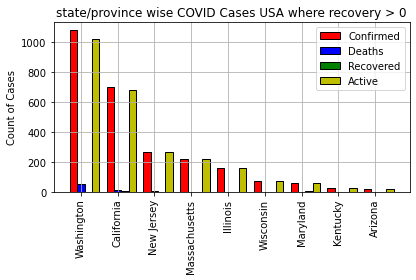

In [27]:
import matplotlib.pyplot as plt
import numpy as np 
State =[]

for state in US_DF['Province/State'] : 
    State.append(state)

width = 0.2
N = US_DF['Confirmed'].count()
ind = np.arange(N)  # the x locations for the groups

fig = plt.figure()
ax = fig.add_subplot()
 

ax1 = ax.bar(ind, US_DF['Confirmed'],width ,color='r',edgecolor = 'black' )
ax2 = ax.bar(ind+width, US_DF['Deaths'],width,color='b' ,edgecolor = 'black')
ax3 = ax.bar(ind+width*2, US_DF['Recovered'],width,color='g',edgecolor = 'black')
ax4 = ax.bar(ind+width*3, US_DF['Active'],width,color='y',edgecolor = 'black')

ax.set_ylabel('Count of Cases')
ax.set_xticks(ind+width)
ax.set_xticklabels(State,rotation='vertical')
ax.legend( (ax1[0], ax2[0], ax3[0],ax4[0]), ('Confirmed', 'Deaths', 'Recovered','Active') )
plt.title('state/province wise COVID Cases USA where recovery > 0')

plt.tight_layout()
plt.grid()
plt.show() 

#### Q10 : visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time.

In [53]:
import pandas as pd
df['Last Update'] = pd.to_datetime(df['Last Update'])
grouped = df.groupby('Last Update').sum()
grouped[['Confirmed']]

,Confirmed
Last Update,
2020-03-11 02:18:14,1381
2020-03-11 20:53:02,0
2020-03-12 02:13:04,935
2020-03-13 11:09:03,451
2020-03-13 14:13:25,696
...,...
2020-03-17 22:53:03,2921
2020-03-17 23:13:10,587
2020-03-17 23:33:02,349


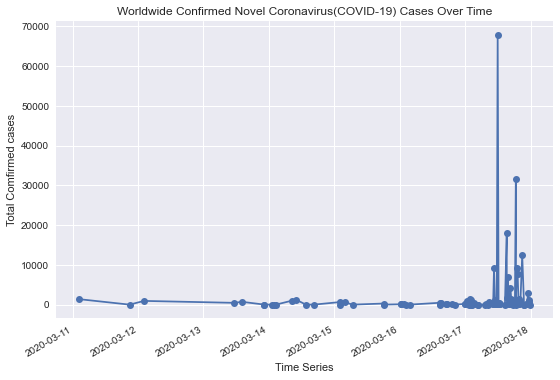

In [55]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')
fig = plt.plot_date(grouped.index, grouped[['Confirmed']],linestyle = 'solid')

plt.xlabel("Time Series")
plt.ylabel("Total Comfirmed cases")
plt.title("Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
plt.gcf().autofmt_xdate()

plt.tight_layout() 
plt.show()